In [136]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE 
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [138]:
#load data
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [140]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [144]:
df.shape

(7043, 21)

In [146]:
#Drop unnecessary columns
df = df.drop('customerID', axis=1)

In [148]:
#Convert total charges to numeric and fill null values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isna().sum()

11

In [150]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [152]:
#List of numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [154]:
#List of numeric columns
categorical_cols = list(df.columns)
categorical_cols.remove('tenure')
categorical_cols.remove('MonthlyCharges')
categorical_cols.remove('TotalCharges')
categorical_cols.remove('Churn')
categorical_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [156]:
for col in categorical_cols:
    print(f"Unique values for {col}':")
    print(df[col].unique(), "\n")

Unique values for gender':
['Female' 'Male'] 

Unique values for SeniorCitizen':
[0 1] 

Unique values for Partner':
['Yes' 'No'] 

Unique values for Dependents':
['No' 'Yes'] 

Unique values for PhoneService':
['No' 'Yes'] 

Unique values for MultipleLines':
['No phone service' 'No' 'Yes'] 

Unique values for InternetService':
['DSL' 'Fiber optic' 'No'] 

Unique values for OnlineSecurity':
['No' 'Yes' 'No internet service'] 

Unique values for OnlineBackup':
['Yes' 'No' 'No internet service'] 

Unique values for DeviceProtection':
['No' 'Yes' 'No internet service'] 

Unique values for TechSupport':
['No' 'Yes' 'No internet service'] 

Unique values for StreamingTV':
['No' 'Yes' 'No internet service'] 

Unique values for StreamingMovies':
['No' 'Yes' 'No internet service'] 

Unique values for Contract':
['Month-to-month' 'One year' 'Two year'] 

Unique values for PaperlessBilling':
['Yes' 'No'] 

Unique values for PaymentMethod':
['Electronic check' 'Mailed check' 'Bank transfer (autom

In [158]:
#Remove redundant values
df = df.replace({'No phone service':'No',
            'No internet service':'No'})

In [160]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace(
    {0:'No',
     1:'Yes'})

In [162]:
for col in categorical_cols:
    print(f"Unique values for {col}:")
    print(df[col].unique(), "\n")

Unique values for gender:
['Female' 'Male'] 

Unique values for SeniorCitizen:
['No' 'Yes'] 

Unique values for Partner:
['Yes' 'No'] 

Unique values for Dependents:
['No' 'Yes'] 

Unique values for PhoneService:
['No' 'Yes'] 

Unique values for MultipleLines:
['No' 'Yes'] 

Unique values for InternetService:
['DSL' 'Fiber optic' 'No'] 

Unique values for OnlineSecurity:
['No' 'Yes'] 

Unique values for OnlineBackup:
['Yes' 'No'] 

Unique values for DeviceProtection:
['No' 'Yes'] 

Unique values for TechSupport:
['No' 'Yes'] 

Unique values for StreamingTV:
['No' 'Yes'] 

Unique values for StreamingMovies:
['No' 'Yes'] 

Unique values for Contract:
['Month-to-month' 'One year' 'Two year'] 

Unique values for PaperlessBilling:
['Yes' 'No'] 

Unique values for PaymentMethod:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 



In [164]:
#Creating a copy of data for visualization
data_viz = df.copy()
data_viz.loc[:,'Churn'] = data_viz.loc[:,'Churn'].apply(lambda x: 'Churn' if x=='Yes' else 'Retain')

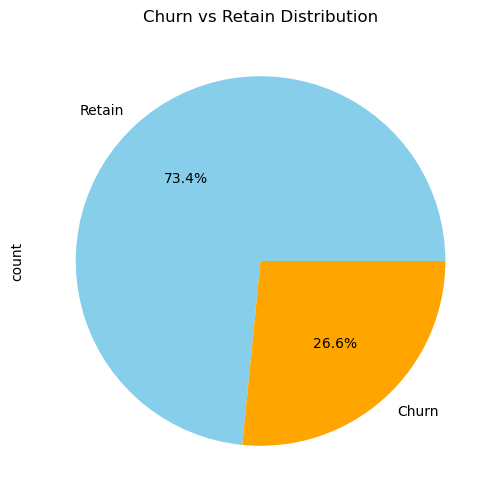

In [166]:
#Checking distribution of churn and retain
churn_distribution = data_viz['Churn'].value_counts()
plt.figure(figsize=(6,6))
churn_distribution.plot.pie(autopct='%1.1f%%', labels=churn_distribution.index, colors=['skyblue', 'orange'])
plt.title('Churn vs Retain Distribution')
plt.show()

Churn      Churn    Retain
gender                    
Female  0.269595  0.730405
Male    0.262046  0.737954


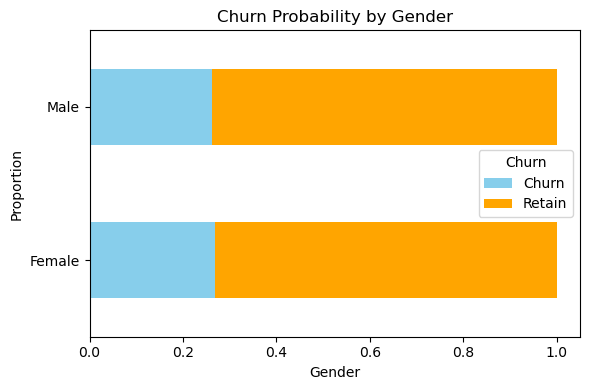

In [168]:
#Churn probability by gender
churn_prob = data_viz.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
print(churn_prob)

# Plot the stacked bar chart
churn_prob.plot(kind='barh', stacked=True, figsize=(6, 4), color=['skyblue', 'orange'])
plt.title('Churn Probability by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Churn', labels=['Churn', 'Retain'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [170]:
#Churn probability for each attribute
import inflection
from dython.nominal import associations
columns = data_viz['Churn']

attr_crosstab = pd.DataFrame()

for col in categorical_cols:
  # create crosstab for each attribute
  index = data_viz[col]
  ct = pd.crosstab(index=index, columns=columns, normalize='index', colnames=[None]).reset_index()

  # add prefix to each category
  # format: column name (category)
  col_titleize = inflection.titleize(col)
  ct[col] = ct[col].apply(lambda x: f'{col_titleize} ({x})')

  # rename the column
  ct.rename(columns={col:'attribute'}, inplace=True)

  # create a single dataframe
  attr_crosstab = pd.concat([attr_crosstab, ct])

attr_crosstab = attr_crosstab.sort_values('Churn', ascending=False).reset_index(drop=True)
attr_crosstab.style.background_gradient()

,attribute,Churn,Retain
0,Payment Method (Electronic check),0.452854,0.547146
1,Contract (Month-to-month),0.427097,0.572903
2,Internet Service (Fiber optic),0.418928,0.581072
3,Senior Citizen (Yes),0.416813,0.583187
4,Paperless Billing (Yes),0.335893,0.664107
5,Partner (No),0.329761,0.670239
6,Online Security (No),0.313733,0.686267
7,Dependents (No),0.312791,0.687209
8,Tech Support (No),0.312300,0.687700
9,Streaming Tv (Yes),0.301147,0.698853


In [174]:
#Describe numerical features
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [176]:
#Create X and y values from dataset
X = df.drop(columns=['Churn'])
y = df['Churn']

In [178]:
#Split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [180]:
#Fit label encoding to Churn values in training set
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [182]:
#Transforming y_train and y_test and comparing
y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)
print(y_train[:5].values)
print(y_train_encode[:5])

['No' 'No' 'No' 'No' 'Yes']
[0 0 0 0 1]


In [184]:
#Fit one hot encoding to non ordinal values X
ohe = OneHotEncoder(sparse_output=False, drop='if_binary')
ohe.fit(X_train[categorical_cols])
X_train_ohe = ohe.transform(X_train[categorical_cols])
X_test_ohe = ohe.transform(X_test[categorical_cols])

In [186]:
X_train_ohe

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 1., 0.]])

In [188]:
column_ohe = ohe.get_feature_names_out()
column_ohe

array(['gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [190]:
# create dataframe from one-hot encoded features
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=column_ohe, index=X_train.index)

# combine the numerical and encoded features
X_train_encode = pd.concat([X_train.drop(columns=categorical_cols), X_train_ohe_df], axis=1)
X_train_encode.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,...,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3457,1,19.50,19.50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
612,66,20.55,1357.10,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
589,71,90.40,6668.05,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2685,72,100.65,7334.05,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1549,1,45.85,45.85,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [192]:
# create dataframe from one-hot encoded features
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=column_ohe, index=X_test.index)

# combine the numerical and encoded features
X_test_encode = pd.concat([X_test.drop(columns=categorical_cols), X_test_ohe_df], axis=1)
X_test_encode.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,...,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1778,72,24.75,1859.10,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5036,16,85.35,1375.15,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1106,63,97.45,6253.00,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1665,9,76.85,663.55,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
927,13,81.15,952.30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [194]:
#Scaling the encoded numerical data
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

X_train_scale = X_train_encode.copy()
X_test_scale = X_test_encode.copy()

for i in numerical_cols:
  scaler = MinMaxScaler()
  scaler.fit(X_train_scale[[i]])

  X_train_scale[[i]] = scaler.transform(X_train_scale[[i]])
  X_test_scale[[i]] = scaler.transform(X_test_scale[[i]])

In [196]:
X_train_scale

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,...,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3457,0.000000,0.012438,0.000081,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
612,0.915493,0.022886,0.154431,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
589,0.985915,0.717910,0.767280,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2685,1.000000,0.819900,0.844132,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1549,0.000000,0.274627,0.003121,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0.253521,0.468657,0.139978,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
5200,0.971831,0.878109,0.851396,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3987,0.140845,0.579602,0.094525,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
235,0.014085,0.359701,0.010997,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [198]:
#Over sampling the data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scale, y_train_encode)

X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train_smote.columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['Churn'])

data_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

In [202]:
#Checking value count of churn and retain after oversampling
data_smote['Churn'].value_counts()

Churn
0    4122
1    4122
Name: count, dtype: int64

In [204]:
#Function to evaluate the models
def get_score(y_pred_list, y_test, average=None, plot=True, axis=0, cmap='Blues'):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  roc_auc = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    if average != None:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred, average=average))
      recall.append(recall_score(y_test, y_pred, average=average))
      f1.append(f1_score(y_test, y_pred, average=average))
      roc_auc.append(roc_auc_score(y_test, y_pred, average=average))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        f'{average}_avg_precision':precision,
        f'{average}_avg_recall':recall,
        f'{average}_avg_f1_score':f1,
        'roc_auc':roc_auc
      }
    else:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred))
      recall.append(recall_score(y_test, y_pred))
      f1.append(f1_score(y_test, y_pred))
      roc_auc.append(roc_auc_score(y_test, y_pred))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'roc_auc':roc_auc
      }

  score_df = pd.DataFrame(score_list).set_index('model')

  if plot:
    display(score_df.style.background_gradient(axis=axis, cmap=cmap))

  return score_df

In [206]:
#List of models
model_list = {
    'Logistic Regression':LogisticRegression(max_iter=1000, random_state=1),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(random_state=1),
    'Decision Tree':DecisionTreeClassifier(random_state=1),
    'Random Forest':RandomForestClassifier(random_state=1),
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
}

X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

In [208]:
#Fitting and evaluating the model
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_smote = get_score(y_pred_list, y_test_model, average='macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Logistic Regression,0.758351,0.722645,0.780003,0.729006,0.780003
KNN,0.695096,0.661401,0.704481,0.660696,0.704481
SVC,0.777541,0.722281,0.756653,0.733495,0.756653
Decision Tree,0.713575,0.644139,0.661163,0.649911,0.661163
Random Forest,0.768301,0.701403,0.709662,0.705188,0.709662
Gradient Boosting Classifier,0.790334,0.731683,0.753783,0.740616,0.753783


In [210]:
#Saving the model with highest accuracy, gradient boosting classifier
joblib.dump('Gradient Boosting Classifier', 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']